# Logistic Regression Models for Mortality Prediction

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline 

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
csv = '/home/shikha/Documents/PS1/COVID-19/notebooks/clean_df.csv'
df = pd.read_csv(csv)
df

,Unnamed: 0,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,...,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY,Age Above 60?,Temp Groups,CORADS 6
0,0,1013,IGIB1040201013,IGIB1040201013-1,0.551724,1,0.436782,"fever, cough,breathlessness",1,1,...,0.127089,0.152271,sinus rhythm,normal,4.0,5a,No,0,0.2,0.0
1,1,1014,IGIB1040201014,IGIB1040201014-1,0.241379,0,0.804598,asymptomatic,0,0,...,0.172501,0.009346,sinus rhythm,normal,0.0,5b,No,0,0.6,0.0
2,2,1015,IGIB1040201015,IGIB1040201015-1,0.264368,1,0.402299,asymptomatic,0,0,...,0.259224,0.026437,sinus rhythm,normal,0.0,5b,No,0,0.4,0.0
3,3,1016,IGIB1040201016,IGIB1040201016-1,0.781609,1,0.321839,"fever, cough,breathlessness",1,1,...,0.366446,0.443161,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
4,4,1060,IGIB1040201060,IGIB1040201060-1,0.505747,1,1.000000,"fever,cough",1,1,...,0.546200,0.430297,sinus rhythm,normal,5.0,4,No,0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,185,950,IGIB104020950,IGIB104020950-1,0.551724,1,0.977011,"fever, cough,breathlessness",1,1,...,0.219174,0.334734,sinus rhythm,normal,5.0,4,No,0,0.6,0.0
171,186,965,IGIB104020965,IGIB104020965-1,0.321839,1,0.839080,"fever, cough,breathlessness",1,1,...,0.169032,0.362431,sinus tachycardia,normal,5.0,4,No,0,0.6,0.0
172,187,9667,IGIB1040209667,IGIB1040209667-1,0.747126,1,0.310345,"fever, breathlessness",1,1,...,0.177547,0.375164,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
173,188,9759,IGIB1040209759,IGIB1040209759-1,0.689655,0,0.425287,breathlessness and cough,1,0,...,0.669190,0.325282,sinus rhythm,normal,6.0,4,No,1,0.6,1.0


In [3]:
df.drop(columns=['Unnamed: 0'])

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY,Age Above 60?,Temp Groups,CORADS 6
0,1013,IGIB1040201013,IGIB1040201013-1,0.551724,1,0.436782,"fever, cough,breathlessness",1,1,1,...,0.127089,0.152271,sinus rhythm,normal,4.0,5a,No,0,0.2,0.0
1,1014,IGIB1040201014,IGIB1040201014-1,0.241379,0,0.804598,asymptomatic,0,0,0,...,0.172501,0.009346,sinus rhythm,normal,0.0,5b,No,0,0.6,0.0
2,1015,IGIB1040201015,IGIB1040201015-1,0.264368,1,0.402299,asymptomatic,0,0,0,...,0.259224,0.026437,sinus rhythm,normal,0.0,5b,No,0,0.4,0.0
3,1016,IGIB1040201016,IGIB1040201016-1,0.781609,1,0.321839,"fever, cough,breathlessness",1,1,1,...,0.366446,0.443161,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
4,1060,IGIB1040201060,IGIB1040201060-1,0.505747,1,1.000000,"fever,cough",1,1,1,...,0.546200,0.430297,sinus rhythm,normal,5.0,4,No,0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,950,IGIB104020950,IGIB104020950-1,0.551724,1,0.977011,"fever, cough,breathlessness",1,1,1,...,0.219174,0.334734,sinus rhythm,normal,5.0,4,No,0,0.6,0.0
171,965,IGIB104020965,IGIB104020965-1,0.321839,1,0.839080,"fever, cough,breathlessness",1,1,1,...,0.169032,0.362431,sinus tachycardia,normal,5.0,4,No,0,0.6,0.0
172,9667,IGIB1040209667,IGIB1040209667-1,0.747126,1,0.310345,"fever, breathlessness",1,1,0,...,0.177547,0.375164,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
173,9759,IGIB1040209759,IGIB1040209759-1,0.689655,0,0.425287,breathlessness and cough,1,0,1,...,0.669190,0.325282,sinus rhythm,normal,6.0,4,No,1,0.6,1.0


## Model Performance

In [4]:
def model_perf(x,y,model):
    cm = metrics.confusion_matrix(y, model.predict(x))
    plt.figure
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.savefig('covidseverity.png')
    accuracy = model.score(x,y)
    precision,recall,f1,support = sklearn.metrics.precision_recall_fscore_support(y, model.predict(x),average='binary')
    print("Accuracy Score = ",accuracy)
    print("Precision Score = ",precision)    
    print("Recall Score = ",recall)    
    print("F1 Score = ",f1) 

#### Performance Metrics
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

## Implementation

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Initial Factors

In [6]:
#lambda large -> underfitting
#C small -> underfitting
lm = LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1',C=3)

#Maybe - SPO2,Temp
X = df[['Age Above 60?','Gender','Temp Groups','Respiratory rate(breaths per minute)']]
Y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

lm.fit(x_train,y_train)
prediction = lm.predict(x_test)

Accuracy Score =  0.9389312977099237
Precision Score =  0.875
Recall Score =  0.7
F1 Score =  0.7777777777777777


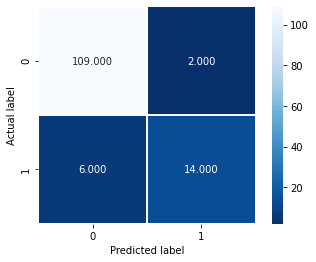

In [7]:
model_perf(x_train,y_train,lm)

Accuracy Score =  0.9318181818181818
Precision Score =  0.6666666666666666
Recall Score =  0.5
F1 Score =  0.5714285714285715


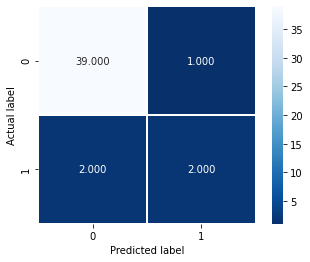

In [8]:
model_perf(x_test,y_test,lm)

### Initial Factors + Symptoms and Comorbidities

In [9]:
lm = LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1',C=3)

#Maybe - SPO2, Temp
X = df[['Age Above 60?','Gender','Temp Groups','Respiratory rate(breaths per minute)','Symptoms Present?','Co-morbidity?','Cough','Breathlessness','Hypertension']]
Y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

lm.fit(x_train,y_train)
prediction = lm.predict(x_test)

Accuracy Score =  0.9465648854961832
Precision Score =  0.8823529411764706
Recall Score =  0.75
F1 Score =  0.8108108108108107


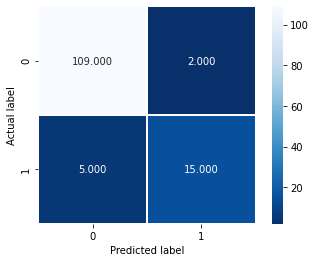

In [10]:
model_perf(x_train,y_train,lm)

Accuracy Score =  0.9318181818181818
Precision Score =  0.6666666666666666
Recall Score =  0.5
F1 Score =  0.5714285714285715


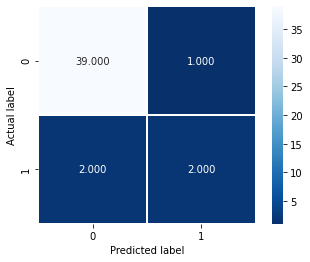

In [11]:
model_perf(x_test,y_test,lm)

### Initial Factors + Symptoms and Comorbidities + Blood

In [12]:
lm = LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1',C=3)

#Maybe - Temp, SPO2, TOTAL PROTEINS, SODIUM
X = df[['Age Above 60?','Gender','Temp Groups','Respiratory rate(breaths per minute)','Symptoms Present?','Co-morbidity?','Cough','Breathlessness','Hypertension','C-REACTIVE PROTEINS','UREA']]
Y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

lm.fit(x_train,y_train)
prediction = lm.predict(x_test)

Accuracy Score =  0.9618320610687023
Precision Score =  0.9411764705882353
Recall Score =  0.8
F1 Score =  0.8648648648648648


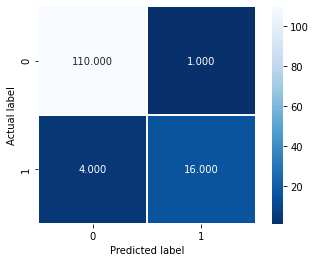

In [13]:
model_perf(x_train,y_train,lm)

Accuracy Score =  0.9545454545454546
Precision Score =  1.0
Recall Score =  0.5
F1 Score =  0.6666666666666666


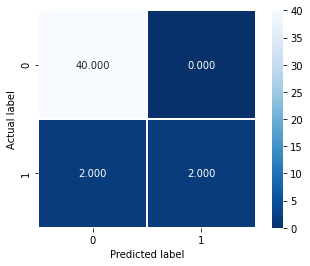

In [14]:
model_perf(x_test,y_test,lm)